# Housing Prices Predictions
This is my code for predicting the price of houses using key features 
_________
My rank at the time of submission of this code was in the top 23%

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')

In [4]:
with description as f:
    for line in f:
        print(line.strip())

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

In [5]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [6]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [7]:
train.corr()['LotFrontage']

Id              -0.010601
MSSubClass      -0.386347
LotFrontage      1.000000
LotArea          0.426095
OverallQual      0.251646
OverallCond     -0.059213
YearBuilt        0.123349
YearRemodAdd     0.088866
MasVnrArea       0.193458
BsmtFinSF1       0.233633
BsmtFinSF2       0.049900
BsmtUnfSF        0.132644
TotalBsmtSF      0.392075
1stFlrSF         0.457181
2ndFlrSF         0.080177
LowQualFinSF     0.038469
GrLivArea        0.402797
BsmtFullBath     0.100949
BsmtHalfBath    -0.007234
FullBath         0.198769
HalfBath         0.053532
BedroomAbvGr     0.263170
KitchenAbvGr    -0.006069
TotRmsAbvGrd     0.352096
Fireplaces       0.266639
GarageYrBlt      0.070250
GarageCars       0.285691
GarageArea       0.344997
WoodDeckSF       0.088521
OpenPorchSF      0.151972
EnclosedPorch    0.010700
3SsnPorch        0.070029
ScreenPorch      0.041383
PoolArea         0.206167
MiscVal          0.003368
MoSold           0.011200
YrSold           0.007450
SalePrice        0.351799
Name: LotFro

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
len(train)

1460

### len(test)

In [11]:
import seaborn as sns

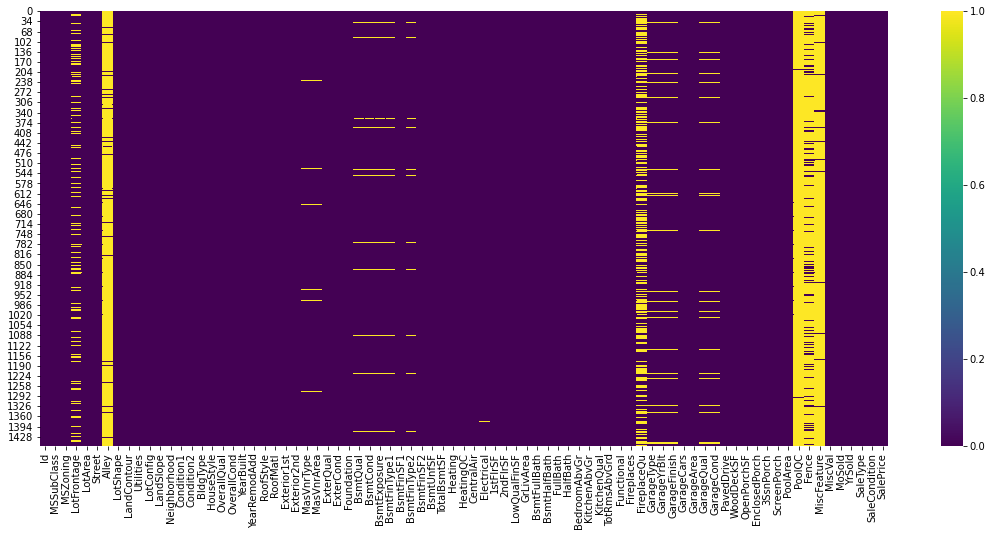

In [12]:
figure=plt.figure(figsize=(19,8))
sns.heatmap(train.isnull(),cmap='viridis')

In [13]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
# train.info()

In [15]:
nullseries=train.isnull().sum()/len(train)*100

In [16]:
print(nullseries[nullseries>0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [17]:
drop_cols=['Alley','PoolQC','Fence','MiscFeature']

In [18]:
train['FireplaceQu']=train['FireplaceQu'].fillna('NA')

In [19]:
test['FireplaceQu']=test['FireplaceQu'].fillna('NA')

In [20]:
test=test.drop(drop_cols,axis=1)

In [21]:
train=train.drop(drop_cols,axis=1)

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
train['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [24]:
train.groupby('LandContour')['LotFrontage'].mean()

LandContour
Bnk    74.553571
HLS    78.065217
Low    83.352941
Lvl    69.267098
Name: LotFrontage, dtype: float64

In [25]:
train.corr()['LotFrontage']

Id              -0.010601
MSSubClass      -0.386347
LotFrontage      1.000000
LotArea          0.426095
OverallQual      0.251646
OverallCond     -0.059213
YearBuilt        0.123349
YearRemodAdd     0.088866
MasVnrArea       0.193458
BsmtFinSF1       0.233633
BsmtFinSF2       0.049900
BsmtUnfSF        0.132644
TotalBsmtSF      0.392075
1stFlrSF         0.457181
2ndFlrSF         0.080177
LowQualFinSF     0.038469
GrLivArea        0.402797
BsmtFullBath     0.100949
BsmtHalfBath    -0.007234
FullBath         0.198769
HalfBath         0.053532
BedroomAbvGr     0.263170
KitchenAbvGr    -0.006069
TotRmsAbvGrd     0.352096
Fireplaces       0.266639
GarageYrBlt      0.070250
GarageCars       0.285691
GarageArea       0.344997
WoodDeckSF       0.088521
OpenPorchSF      0.151972
EnclosedPorch    0.010700
3SsnPorch        0.070029
ScreenPorch      0.041383
PoolArea         0.206167
MiscVal          0.003368
MoSold           0.011200
YrSold           0.007450
SalePrice        0.351799
Name: LotFro

In [26]:
train['LotFrontage'].mean()

70.04995836802665

In [27]:
def func(x):
    contour=x[1]
    frontage=x[0]
    if pd.isnull(frontage):
#         if contour=='Bnk':
#             return 75
#         elif contour=='HLS':
#             return 78
#         elif contour=='Low':
#             return 83
#         else:
#             return 69
        return 70
    else:
        return frontage

In [28]:
train['LotFrontage']=train[['LotFrontage','LandContour']].apply(func,axis=1)

In [29]:
test['LotFrontage']=test[['LotFrontage','LandContour']].apply(func,axis=1)

In [30]:
# pd.isnull(train['LotFrontage'])

In [31]:
nullseries=train.isnull().sum()/len(train)*100
print(nullseries[nullseries>0])

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [32]:
train['MasVnrType'].value_counts()/len(train)*100

None       59.178082
BrkFace    30.479452
Stone       8.767123
BrkCmn      1.027397
Name: MasVnrType, dtype: float64

In [33]:
train['MasVnrType']=train['MasVnrType'].apply(lambda x: 'None' if pd.isnull(x) else x)

In [34]:
test['MasVnrType']=test['MasVnrType'].apply(lambda x: 'None' if pd.isnull(x) else x)

In [35]:
nullseries=train.isnull().sum()/len(train)*100
print(nullseries[nullseries>0])

MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [36]:
train.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [37]:
n=train[train['MasVnrType']=='None']['MasVnrArea']

In [38]:
n[n>0]

624     288.0
773       1.0
1230      1.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64

In [39]:
# p.head()

In [40]:
train.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

In [41]:
def Veneer(x):
    types=x[0]
    area=x[1]
    if pd.isnull(area):
        if types=='BrkCmn':
            return 248
        elif types=='BrkFace':
            return 259
        elif types=='Stone':
            return 239
        else:
            return 0
    else:
        if types=='None':
            return 0
        else:
            return area

In [42]:
train['MasVnrArea']=train[['MasVnrArea','MasVnrType']].apply(Veneer,axis=1)

In [43]:
test['MasVnrArea']=test[['MasVnrArea','MasVnrType']].apply(Veneer,axis=1)

In [44]:
nullseries=train.isnull().sum()/len(train)*100
print(nullseries[nullseries>0])

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [45]:
# description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')
# with description as f:
#     for line in f:
#         print(line.strip())

In [46]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [47]:
test['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [48]:
train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [49]:
train[(pd.isnull(train['BsmtCond'])==False) & (pd.isnull(train['BsmtQual'])==True)]['BsmtCond']

Series([], Name: BsmtCond, dtype: object)

In [50]:
train[(pd.isnull(train['BsmtCond'])==True) & (pd.isnull(train['BsmtQual'])==False)]['BsmtQual']

Series([], Name: BsmtQual, dtype: object)

In [51]:
# #BsmtQual        2.534247
# BsmtCond        2.534247
# BsmtExposure    2.602740
# BsmtFinType1    2.534247
# BsmtFinType2

In [52]:
def Bsmt(x):
    quality=x[0]
    condition=x[1]
    exposure=x[2]
    type1=x[3]
    type2=x[4]
    if pd.isnull(quality):
        type1='NA'
        type2='NA'
        quality='NA'
        exposure='NA'
        quality='NA'
        return quality,condition,exposure,type1,type2
    else:
        return quality,condition,exposure,type1,type2

In [53]:
bmstlist=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [54]:
train['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [55]:
train['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [56]:
train[bmstlist]=train[bmstlist].fillna('NA')

In [57]:
nullseries=train.isnull().sum()/len(train)*100
print(nullseries[nullseries>0])

Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [58]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [59]:
train['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [60]:
# description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')
# with description as f:
#     for line in f:
#         print(line.strip())

In [61]:
train[train['HeatingQC']=='Ex']['Electrical'].value_counts()

SBrkr    713
FuseA     23
FuseF      5
Name: Electrical, dtype: int64

In [62]:
train[train['HeatingQC']=='Gd']['Electrical'].value_counts()

SBrkr    215
FuseA     19
FuseF      3
FuseP      2
Mix        1
Name: Electrical, dtype: int64

In [63]:
train[train['HeatingQC']=='TA']['Electrical'].value_counts()

SBrkr    371
FuseA     44
FuseF     12
FuseP      1
Name: Electrical, dtype: int64

In [64]:
train[train['HeatingQC']=='Fa']['Electrical'].value_counts()

SBrkr    35
FuseA     8
FuseF     6
Name: Electrical, dtype: int64

In [65]:
train[train['HeatingQC']=='Po']['Electrical'].value_counts()

FuseF    1
Name: Electrical, dtype: int64

In [66]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [67]:
train['Electrical']=train['Electrical'].apply(lambda x: 'SBrkr' if pd.isnull(x) else x)

In [68]:
nullseries=train.isnull().sum()/len(train)*100
print(nullseries[nullseries>0])

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


In [69]:
# description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')
# with description as f:
#     for line in f:
#         print(line.strip())

In [70]:
# GarageType      5.547945
# GarageYrBlt     5.547945
# GarageFinish    5.547945
# GarageQual      5.547945
# GarageCond 

In [71]:
Garage_drop=['GarageType','GarageFinish','GarageQual','GarageCond']

In [72]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [73]:
train[Garage_drop]=train[Garage_drop].fillna('NA')

In [74]:
test[Garage_drop]=test[Garage_drop].fillna('NA')

In [75]:
nullseries=train.isnull().sum()/len(train)*100
print(nullseries[nullseries>0])

GarageYrBlt    5.547945
dtype: float64


In [76]:
train['GarageYrBlt']=train['GarageYrBlt'].fillna(0)

In [77]:
nullseries=train.isnull().sum()/len(train)*100
print(nullseries[nullseries>0])

Series([], dtype: float64)


In [78]:
nullseries=test.isnull().sum()/len(test)*100
print(nullseries[nullseries>0])

MSZoning        0.274160
Utilities       0.137080
Exterior1st     0.068540
Exterior2nd     0.068540
BsmtQual        3.015764
BsmtCond        3.084304
BsmtExposure    3.015764
BsmtFinType1    2.878684
BsmtFinSF1      0.068540
BsmtFinType2    2.878684
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
KitchenQual     0.068540
Functional      0.137080
GarageYrBlt     5.346127
GarageCars      0.068540
GarageArea      0.068540
SaleType        0.068540
dtype: float64


In [79]:
test['GarageYrBlt']=test['GarageYrBlt'].fillna(0)

In [80]:
nullseries=test.isnull().sum()/len(test)*100
print(nullseries[nullseries>0])

MSZoning        0.274160
Utilities       0.137080
Exterior1st     0.068540
Exterior2nd     0.068540
BsmtQual        3.015764
BsmtCond        3.084304
BsmtExposure    3.015764
BsmtFinType1    2.878684
BsmtFinSF1      0.068540
BsmtFinType2    2.878684
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
KitchenQual     0.068540
Functional      0.137080
GarageCars      0.068540
GarageArea      0.068540
SaleType        0.068540
dtype: float64


In [81]:
test[bmstlist]=test[bmstlist].fillna('NA')

In [82]:
nullseries=test.isnull().sum()/len(test)*100
print(nullseries[nullseries>0])

MSZoning        0.27416
Utilities       0.13708
Exterior1st     0.06854
Exterior2nd     0.06854
BsmtFinSF1      0.06854
BsmtFinSF2      0.06854
BsmtUnfSF       0.06854
TotalBsmtSF     0.06854
BsmtFullBath    0.13708
BsmtHalfBath    0.13708
KitchenQual     0.06854
Functional      0.13708
GarageCars      0.06854
GarageArea      0.06854
SaleType        0.06854
dtype: float64


In [83]:
# description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')
# with description as f:
#     for line in f:
#         print(line.strip())

In [84]:
# BsmtFinSF1      0.06854
# BsmtFinSF2      0.06854
# BsmtUnfSF       0.06854
# TotalBsmtSF     0.06854
# BsmtFullBath    0.13708
# BsmtHalfBath 
bmstlist1=['BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']

In [85]:
test[bmstlist1]=test[bmstlist1].fillna(0)

In [86]:
nullseries=test.isnull().sum()/len(test)*100
print(nullseries[nullseries>0])

MSZoning       0.27416
Utilities      0.13708
Exterior1st    0.06854
Exterior2nd    0.06854
KitchenQual    0.06854
Functional     0.13708
GarageCars     0.06854
GarageArea     0.06854
SaleType       0.06854
dtype: float64


In [87]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [88]:
test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [89]:
test['MSZoning']=test['MSZoning'].fillna('RL')

In [90]:
nullseries=test.isnull().sum()/len(test)*100
print(nullseries[nullseries>0])

Utilities      0.13708
Exterior1st    0.06854
Exterior2nd    0.06854
KitchenQual    0.06854
Functional     0.13708
GarageCars     0.06854
GarageArea     0.06854
SaleType       0.06854
dtype: float64


In [91]:
# train['SaleType'].value_counts()

In [92]:
train['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [93]:
test['GarageCars']=test['GarageCars'].fillna(0)

In [94]:
nullseries=test.isnull().sum()
print(nullseries[nullseries>0])

Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
GarageArea     1
SaleType       1
dtype: int64


In [95]:
train['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [96]:
#Don't exactly know this one
train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [97]:
train[train['SaleType']=='Normal']['SaleCondition']

Series([], Name: SaleCondition, dtype: object)

In [98]:
test[pd.isnull(test['SaleType'])]['SaleCondition']

1029    Normal
Name: SaleCondition, dtype: object

In [99]:
test['SaleType']=test['SaleType'].fillna('WD')

In [100]:
# description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')
# with description as f:
#     for line in f:
#         print(line.strip())

In [101]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [102]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [103]:
test['Utilities']=test['Utilities'].fillna('AllPub')

In [104]:
nullseries=test.isnull().sum()
print(nullseries[nullseries>0])

Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
GarageArea     1
dtype: int64


In [105]:
train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [106]:
test['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [107]:
train['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [108]:
test['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [109]:
train[train['Exterior2nd']=='VinylSd']['Exterior1st'].value_counts()

VinylSd    502
Wd Sdng      2
Name: Exterior1st, dtype: int64

In [110]:
exterior_cols=['Exterior1st','Exterior2nd']

In [111]:
test[exterior_cols]=test[exterior_cols].fillna('VinylSd')

In [112]:
nullseries=test.isnull().sum()
print(nullseries[nullseries>0])

KitchenQual    1
Functional     2
GarageArea     1
dtype: int64


In [113]:
# description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')
# with description as f:
#     for line in f:
#         print(line.strip())

In [114]:
train['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [115]:
train['KitchenAbvGr']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: KitchenAbvGr, Length: 1460, dtype: int64

In [116]:
test['KitchenAbvGr'].value_counts()

1    1393
2      64
0       2
Name: KitchenAbvGr, dtype: int64

In [117]:
test[test['KitchenAbvGr']==0]['KitchenQual']

1127    TA
1399    TA
Name: KitchenQual, dtype: object

In [118]:
train[train['KitchenAbvGr']==0]['KitchenQual']

954    TA
Name: KitchenQual, dtype: object

In [119]:
test['KitchenQual']=test['KitchenQual'].fillna('TA')

In [120]:
nullseries=test.isnull().sum()
print(nullseries[nullseries>0])

Functional    2
GarageArea    1
dtype: int64


In [121]:
train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [122]:
test['Functional']=test['Functional'].fillna('Typ')

In [123]:
test[pd.isnull(test['GarageArea'])==True]['GarageCond']

1116    NA
Name: GarageCond, dtype: object

In [124]:
test['GarageArea']=test['GarageArea'].fillna(0)

In [125]:
# nullseries=test.isnull().sum()
# print(nullseries[nullseries>0])

In [126]:
description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')
with description as f:
    for line in f:
        print(line.strip())

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

In [127]:
test.shape

(1459, 76)

In [128]:
train.shape

(1460, 77)

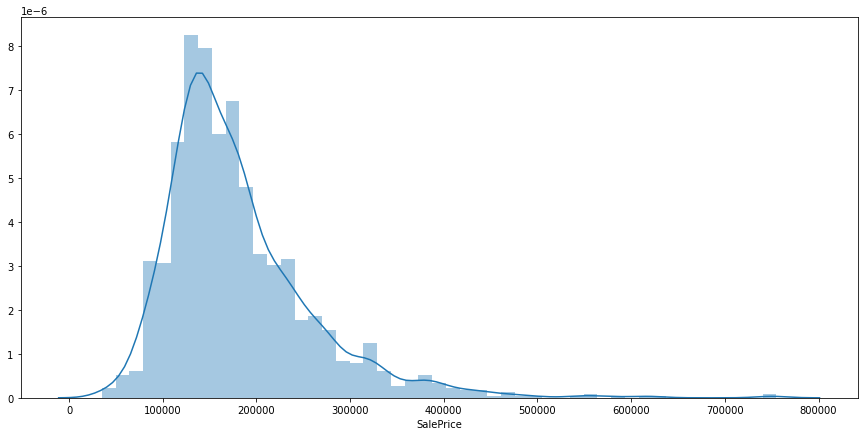

In [129]:
plt.figure(figsize=(15,7))
sns.distplot(train['SalePrice'])

In [130]:
# train['GarageFinish']

In [131]:
train.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.334897
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.261366
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [132]:
description=open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt')
with description as f:
    for line in f:
        print(line.strip())

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

In [133]:
train['Total_Bathrooms'] = (train['FullBath'] + (0.5*train['HalfBath']) +
                            train['BsmtFullBath'] + (0.5*train['BsmtHalfBath']))

test['Total_Bathrooms'] = (test['FullBath'] + (0.5*test['HalfBath']) + 
                           test['BsmtFullBath'] + (0.5*test['BsmtHalfBath']))

train['TotalSF'] = (train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'])
test['TotalSF'] = (test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF'])

In [134]:
train['Bsmt'] = (train['BsmtQual'] + train['BsmtCond']) 
test['Bsmt'] = (test['BsmtQual'] + test['BsmtCond']) 

train['Garage'] = (train['GarageQual'] + train['GarageCond']) 
test['Garage'] = (test['GarageQual'] + test['GarageCond']) 

train['External'] = (train['ExterQual'] + train['ExterCond']) 
test['External'] = (test['ExterQual'] + test['ExterCond'])

In [135]:
# test2.isnull().sum()

In [136]:
# drop_cols=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
#not_droped=[]
drop_cols_again=['MiscVal','3SsnPorch','MoSold','YrSold','Condition1','Condition2','LowQualFinSF','FullBath','HalfBath'
                 ,'BsmtFullBath','BsmtHalfBath','MasVnrType','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','ExterQual'
                ,'ExterCond','BsmtQual','BsmtCond','GarageQual','GarageCond','Utilities']

# dummie_cols=[]

label_cols=('LandSlope','BldgType','BsmtFinType1','BsmtFinType2','HeatingQC','Electrical'
            ,'KitchenQual','GarageFinish','PavedDrive','LotConfig','RoofStyle','RoofMatl'
            ,'Exterior2nd','Exterior1st','Foundation','Heating','SaleType','SaleCondition','Functional','LandContour'
            ,'LotShape','OverallQual','GarageType','OverallCond','HouseStyle','BsmtExposure'
            ,'MSZoning','FireplaceQu','Street','CentralAir','YearRemodAdd','Neighborhood')
label_cols1=['MSSubClass','Bsmt','External','Garage']

In [137]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Bsmt,Garage,External
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,7,4,6,6,3,9,6,12,12,12
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,TA,TA,Y,WD,Normal,TATA,TATA,TATA
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,870,605,1311,1326,1340,1267,1198,596,1291,773


In [138]:
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [139]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_Bathrooms,TotalSF,Bsmt,Garage,External
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,3.5,2566,GdTA,TATA,GdTA
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,2.5,2524,GdTA,TATA,TATA
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,3.5,2706,GdTA,TATA,GdTA
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,2.0,2473,TAGd,TATA,TATA
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,3.5,3343,GdTA,TATA,GdTA


In [140]:
train1=train.drop(drop_cols_again,axis=1).copy()

In [141]:
train1.shape

(1460, 59)

In [142]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_Bathrooms,TotalSF,Bsmt,Garage,External
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,3.5,2566,GdTA,TATA,GdTA
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,2.5,2524,GdTA,TATA,TATA
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,3.5,2706,GdTA,TATA,GdTA
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,2.0,2473,TAGd,TATA,TATA
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,3.5,3343,GdTA,TATA,GdTA


In [143]:
train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,Total_Bathrooms,TotalSF,Bsmt,Garage,External
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,WD,Normal,208500,3.5,2566,GdTA,TATA,GdTA
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,WD,Normal,181500,2.5,2524,GdTA,TATA,TATA
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,WD,Normal,223500,3.5,2706,GdTA,TATA,GdTA
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,0,WD,Abnorml,140000,2.0,2473,TAGd,TATA,TATA
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,WD,Normal,250000,3.5,3343,GdTA,TATA,GdTA


In [144]:
# train1.head()

In [145]:
# train1['SalePrice']

In [146]:
test1=test.drop(drop_cols_again,axis=1).copy()

In [147]:
test1.shape

(1459, 58)

In [148]:
train1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,Total_Bathrooms,TotalSF,Bsmt,Garage,External
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,WD,Normal,208500,3.5,2566,GdTA,TATA,GdTA
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,WD,Normal,181500,2.5,2524,GdTA,TATA,TATA
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,WD,Normal,223500,3.5,2706,GdTA,TATA,GdTA
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,0,WD,Abnorml,140000,2.0,2473,TAGd,TATA,TATA
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,WD,Normal,250000,3.5,3343,GdTA,TATA,GdTA


In [149]:
test1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,Total_Bathrooms,TotalSF,Bsmt,Garage,External
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,...,0,120,0,WD,Normal,1.0,1778.0,TATA,TATA,TATA
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,...,0,0,0,WD,Normal,1.5,2658.0,TATA,TATA,TATA
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,WD,Normal,2.5,2557.0,GdTA,TATA,TATA
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,WD,Normal,2.5,2530.0,TATA,TATA,TATA
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,...,0,144,0,WD,Normal,2.0,2560.0,GdTA,TATA,GdTA


In [150]:
from sklearn.preprocessing import LabelEncoder

In [151]:
# train1['LandContour']

In [152]:
t=train.copy()

In [153]:
for c in label_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(t[c].values)) 
    t[c] = lbl.transform(list(t[c].values))

In [154]:
# t=pd.get_dummies(t,columns=dummie_cols,drop_first=True)

In [155]:
a=t.corr()
a[a['SalePrice']>0.05]['SalePrice']

LotFrontage        0.334897
LotArea            0.263843
LandSlope          0.051152
Neighborhood       0.210851
HouseStyle         0.180163
OverallQual        0.790982
YearBuilt          0.522897
YearRemodAdd       0.507101
RoofStyle          0.222405
RoofMatl           0.132383
Exterior1st        0.103551
Exterior2nd        0.103766
Foundation         0.382479
BsmtFinSF1         0.386420
BsmtFinType2       0.072717
BsmtUnfSF          0.214479
TotalBsmtSF        0.613581
CentralAir         0.251328
Electrical         0.234945
1stFlrSF           0.605852
2ndFlrSF           0.319334
GrLivArea          0.708624
BsmtFullBath       0.227122
FullBath           0.560664
HalfBath           0.284108
BedroomAbvGr       0.168213
TotRmsAbvGrd       0.533723
Functional         0.115328
Fireplaces         0.466929
GarageYrBlt        0.261366
GarageCars         0.640409
GarageArea         0.623431
PavedDrive         0.231357
WoodDeckSF         0.324413
OpenPorchSF        0.315856
ScreenPorch        0

In [156]:
a=t.corr()
a[a['SalePrice']<-0.05]['SalePrice']

MSSubClass      -0.084284
MSZoning        -0.166872
LotShape        -0.255580
LotConfig       -0.067396
BldgType        -0.085591
OverallCond     -0.077856
BsmtExposure    -0.294589
BsmtFinType1    -0.098734
Heating         -0.098812
HeatingQC       -0.400178
KitchenAbvGr    -0.135907
KitchenQual     -0.589189
FireplaceQu     -0.097176
GarageType      -0.415283
GarageFinish    -0.425684
EnclosedPorch   -0.128578
SaleType        -0.054911
Name: SalePrice, dtype: float64

In [157]:
a=t.corr()
a[(a['SalePrice']>-0.05) & (a['SalePrice']<0)]['SalePrice']

Id             -0.021917
BsmtFinSF2     -0.011378
LowQualFinSF   -0.025606
BsmtHalfBath   -0.016844
MiscVal        -0.021190
YrSold         -0.028923
Name: SalePrice, dtype: float64

In [158]:
a=t.corr()
a[(a['SalePrice']<0.05) & (a['SalePrice']>0)]['SalePrice']

Street         0.041036
LandContour    0.015453
3SsnPorch      0.044584
MoSold         0.046432
Name: SalePrice, dtype: float64

In [159]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

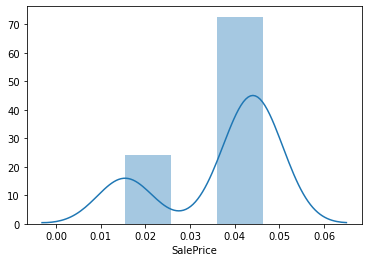

In [160]:
sns.distplot(a[(a['SalePrice']<0.05) & (a['SalePrice']>0)]['SalePrice'])

In [161]:
for feature in label_cols:
    labels_ordered=train1.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train1[feature]=train1[feature].map(labels_ordered)
    test1[feature]=test1[feature].map(labels_ordered)

In [162]:
# train1

In [163]:
for c in label_cols1:
    lbl = LabelEncoder() 
    lbl.fit(list(train1[c].values)) 
    train1[c] = lbl.transform(list(train1[c].values))

In [164]:
train1.shape

(1460, 59)

In [165]:
for c in label_cols1:
    lbl = LabelEncoder()  
    test1[c] = lbl.fit_transform(list(test1[c].values))

In [166]:
train1.shape

(1460, 59)

In [167]:
# lbl=LabelEncoder()
# train1=lbl.fit_transform(train1[label_cols[1]])
# test1=lbl.transform(test1[label_cols[1]])

In [168]:
train1.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [169]:
# dummie_cols

In [170]:
# train2=pd.get_dummies(train1,columns=dummie_cols,drop_first=True)
train2=train1.copy()

In [171]:
train2.shape

(1460, 59)

In [172]:
train1.shape

(1460, 59)

In [173]:
# test2=pd.get_dummies(test1,columns=dummie_cols,drop_first=True)
test2=test1.copy()

In [174]:
test2.shape

(1459, 58)

In [175]:
# test2.shape

In [176]:
test1.shape

(1459, 58)

In [177]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 58 columns):
Id                 1459 non-null int64
MSSubClass         1459 non-null int64
MSZoning           1459 non-null int64
LotFrontage        1459 non-null float64
LotArea            1459 non-null int64
Street             1459 non-null int64
LotShape           1459 non-null int64
LandContour        1459 non-null int64
LotConfig          1459 non-null int64
LandSlope          1459 non-null int64
Neighborhood       1459 non-null int64
BldgType           1459 non-null int64
HouseStyle         1459 non-null int64
OverallQual        1459 non-null int64
OverallCond        1459 non-null int64
YearBuilt          1459 non-null int64
YearRemodAdd       1459 non-null int64
RoofStyle          1459 non-null int64
RoofMatl           1459 non-null int64
Exterior1st        1459 non-null int64
Exterior2nd        1459 non-null int64
Foundation         1459 non-null int64
BsmtExposure       1459 non-null 

In [178]:
import seaborn as sns

In [179]:
train['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

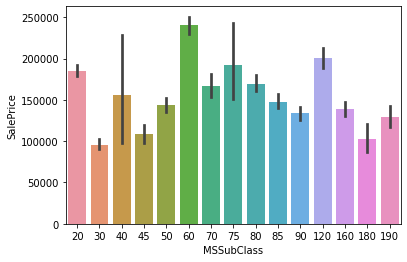

In [180]:
sns.barplot(data=train,x='MSSubClass',y='SalePrice')

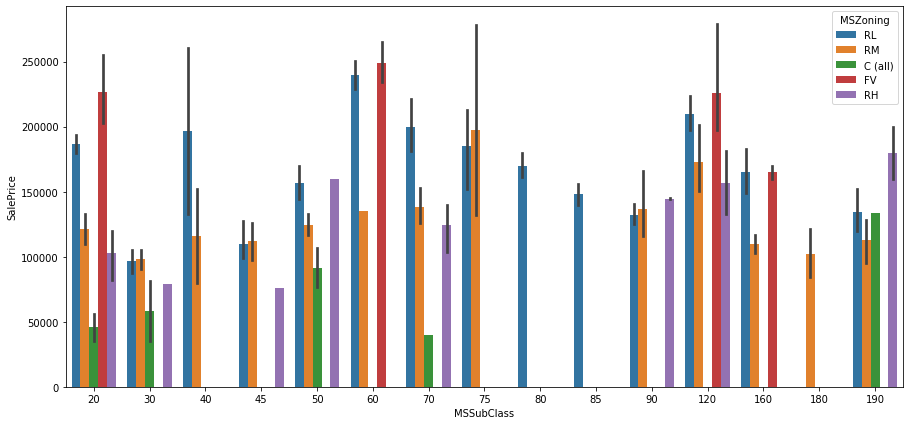

In [181]:
plt.figure(figsize=(15,7))
sns.barplot(data=train,x='MSSubClass',y='SalePrice',hue='MSZoning')

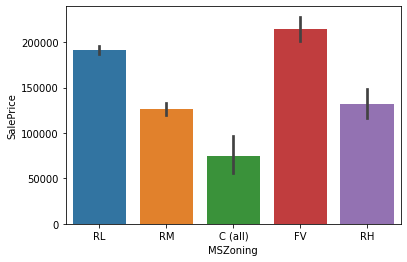

In [182]:
sns.barplot(data=train,x='MSZoning',y='SalePrice')

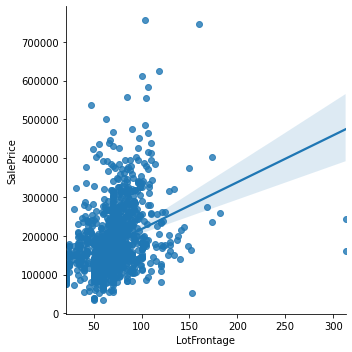

In [183]:
sns.lmplot(data=train,x='LotFrontage',y='SalePrice')

In [184]:
train1['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [185]:
train.corr()['SalePrice']

Id                -0.021917
MSSubClass        -0.084284
LotFrontage        0.334897
LotArea            0.263843
OverallQual        0.790982
OverallCond       -0.077856
YearBuilt          0.522897
YearRemodAdd       0.507101
BsmtFinSF1         0.386420
BsmtFinSF2        -0.011378
BsmtUnfSF          0.214479
TotalBsmtSF        0.613581
1stFlrSF           0.605852
2ndFlrSF           0.319334
LowQualFinSF      -0.025606
GrLivArea          0.708624
BsmtFullBath       0.227122
BsmtHalfBath      -0.016844
FullBath           0.560664
HalfBath           0.284108
BedroomAbvGr       0.168213
KitchenAbvGr      -0.135907
TotRmsAbvGrd       0.533723
Fireplaces         0.466929
GarageYrBlt        0.261366
GarageCars         0.640409
GarageArea         0.623431
WoodDeckSF         0.324413
OpenPorchSF        0.315856
EnclosedPorch     -0.128578
3SsnPorch          0.044584
ScreenPorch        0.111447
PoolArea           0.092404
MiscVal           -0.021190
MoSold             0.046432
YrSold            -0

In [186]:
train2.drop('Id',axis=1,inplace=True)
test2.drop('Id',axis=1,inplace=True)

In [187]:
train_copy=train2.copy()

In [188]:
#@@@@!!!!

# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(train_copy))
# print(z)

In [189]:
#@@@!!!!!!

# train_copy2=train_copy[(z<3).all(axis=1)]

In [190]:
outliers = [88,462,523,588,632,968,1298,1324]
train2=train2.drop(index=outliers)

In [191]:
X=train2.drop('SalePrice',axis=1)
y=train2['SalePrice']

In [192]:
from sklearn.preprocessing import MinMaxScaler

In [193]:
scaler=MinMaxScaler()

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
train2.shape

(1452, 58)

In [196]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [197]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [198]:
# train2.select_dtypes(exclude=["number","bool_"])

In [199]:
# for i in train2.columns:
#     print(i)
#     print('\n')

In [200]:
#####How to find categorical columns in dataframe
############
# train2.select_dtypes(include='object')

In [201]:
train2.select_dtypes(include='object')

""
0
1
2
3
4
...
1455
1456
1457
1458


In [202]:
# train2['MasVnrArea'].value_counts()

In [203]:
X_train

array([[0.28571429, 0.75      , 0.13356164, ..., 1.        , 1.        ,
        1.        ],
       [0.07142857, 0.25      , 0.17123288, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.75      , 0.16780822, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.85714286, 1.        , 0.03082192, ..., 0.63636364, 1.        ,
        0.54545455],
       [0.        , 0.75      , 0.09246575, ..., 0.63636364, 1.        ,
        0.54545455],
       [0.35714286, 0.75      , 0.16780822, ..., 0.72727273, 1.        ,
        1.        ]])

In [204]:
t=train2.drop('SalePrice',axis=1)

In [205]:
# Get missing columns in the training test
missing_cols = set( t.columns ) - set( test2.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test2[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test2 = test2[t.columns]

In [206]:
# from sklearn.decomposition import PCA

In [207]:
# pca=PCA(n_components=3)

In [208]:
# X_train=pca.fit_transform(X_train)
# X_test=pca.transform(X_test)

In [209]:
test2.shape

(1459, 57)

In [210]:
# test2=pca.transform(test2)

In [211]:
# pca.explained_variance_ratio_

In [212]:
X_train

array([[0.28571429, 0.75      , 0.13356164, ..., 1.        , 1.        ,
        1.        ],
       [0.07142857, 0.25      , 0.17123288, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.75      , 0.16780822, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.85714286, 1.        , 0.03082192, ..., 0.63636364, 1.        ,
        0.54545455],
       [0.        , 0.75      , 0.09246575, ..., 0.63636364, 1.        ,
        0.54545455],
       [0.35714286, 0.75      , 0.16780822, ..., 0.72727273, 1.        ,
        1.        ]])

In [213]:
X_test.shape

(436, 57)

In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'Second Principal Component')

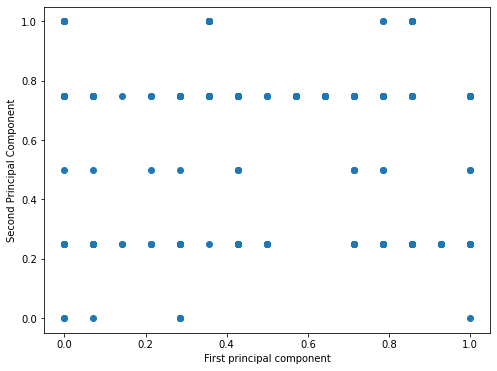

In [215]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [216]:
from sklearn.model_selection import cross_val_score

In [217]:
rfc=RandomForestRegressor(n_estimators=1350,min_samples_leaf=5)
svr=SVR()
linear=LinearRegression()

In [218]:
# para_grid={'n_estimators':[1325,1340,1350,1355],'min_samples_leaf':[1,3,5,7]}

In [219]:
# from sklearn.model_selection import GridSearchCV

In [220]:
# grid=GridSearchCV(RandomForestRegressor(),para_grid,verbose=3)

In [221]:
# grid.fit(X_train,y_train)

In [222]:
# grid.best_params_

In [223]:
accuracies=cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)

In [224]:
accuracies.mean()

0.8780203827392737

In [225]:
accuracies.std()

0.036494497946399286

In [226]:
# accuracies=cross_val_score(estimator=svr,X=X_train,y=y_train,cv=10)

In [227]:
# accuracies.mean()

In [228]:
# accuracies.std()

In [229]:
# accuracies=cross_val_score(estimator=linear,X=X_train,y=y_train,cv=10)

In [230]:
# accuracies.mean()

In [231]:
# accuracies.std()

In [232]:
# X_train.select_dtypes(include='object')

In [233]:
X_train[:,0]

array([0.28571429, 0.07142857, 0.        , ..., 0.85714286, 0.        ,
       0.35714286])

In [234]:
# # plt.figure(figsize=(8,6))
# sns.jointplot(X_train[:,0],X_train[:,1],kind='reg')
# plt.xlabel('First principal component')
# plt.ylabel('Second Principal Component')

In [235]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1350, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [236]:
predictions1=rfc.predict(X_test)

In [237]:
from sklearn.metrics import mean_squared_error

In [238]:
print(mean_squared_error(y_test,predictions1)**0.5)

24497.959160568196


In [239]:
sample=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [240]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [241]:
len(test['Id'])

1459

In [242]:
len(predictions1)

436

In [243]:
test2[test2['MSSubClass']==pd.isnull(test2['MSSubClass'])]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,Total_Bathrooms,TotalSF,Bsmt,Garage,External
0,0,2,80.0,11622,1,0,1,0,0,10,...,0,120,0,4,4,1.0,1778.0,18,12,14
1,0,3,81.0,14267,1,1,1,2,0,10,...,0,0,0,4,4,1.5,2658.0,18,12,14
6,0,3,70.0,7980,1,1,1,0,0,14,...,0,0,0,4,4,3.0,2355.0,10,12,12
8,0,3,85.0,10176,1,0,1,0,0,14,...,0,0,0,4,4,2.5,2641.0,10,12,14
9,0,3,70.0,8400,1,0,1,2,0,10,...,0,0,0,4,4,2.0,1764.0,18,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,0,3,88.0,11577,1,0,1,0,0,21,...,0,0,0,8,5,3.0,3676.0,10,12,1
1444,0,3,125.0,31250,1,0,1,0,0,11,...,135,0,0,4,4,1.5,1600.0,12,2,11
1447,0,3,58.0,10172,1,1,1,0,0,11,...,0,0,0,4,4,2.0,1738.0,18,12,14
1451,0,3,80.0,13384,1,0,1,0,1,11,...,0,0,0,4,4,2.0,2464.0,18,12,14


In [244]:
test2.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
Foundation         0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
GrLivArea          0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu        0
GarageType         0
GarageYrBlt        0
GarageFinish       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch

In [245]:
train2['External'].value_counts()

11    770
6     452
9     107
2      46
5      35
8      22
4       8
3       5
1       3
7       2
10      1
0       1
Name: External, dtype: int64

In [246]:
test['External'].value_counts()

TATA    750
GdTA    447
TAGd    112
ExTA     53
GdGd     40
TAFa     25
FaFa     13
FaTA      6
TAEx      4
GdEx      3
ExEx      2
GdFa      1
TAPo      1
FaGd      1
FaPo      1
Name: External, dtype: int64

In [247]:
train2['MSSubClass'].value_counts()

0     532
5     297
4     142
11     87
1      69
12     63
6      60
8      58
10     52
14     30
9      20
7      16
3      12
13     10
2       4
Name: MSSubClass, dtype: int64

In [248]:
test2['MSSubClass'].value_counts()

0     543
5     276
4     143
11     95
1      70
6      68
13     65
8      60
10     57
15     31
9      28
14      7
7       7
3       6
2       2
12      1
Name: MSSubClass, dtype: int64

In [249]:
test2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,Total_Bathrooms,TotalSF,Bsmt,Garage,External
0,0,2,80.0,11622,1,0,1,0,0,10,...,0,120,0,4,4,1.0,1778.0,18,12,14
1,0,3,81.0,14267,1,1,1,2,0,10,...,0,0,0,4,4,1.5,2658.0,18,12,14
2,5,3,74.0,13830,1,1,1,0,0,14,...,0,0,0,4,4,2.5,2557.0,10,12,14
3,5,3,78.0,9978,1,1,1,0,0,14,...,0,0,0,4,4,2.5,2530.0,18,12,14
4,11,3,43.0,5005,1,1,3,0,0,22,...,0,144,0,4,4,2.0,2560.0,10,12,9


In [250]:
predictions=rfc.predict(test2)

In [251]:
sub = pd.DataFrame()
sub['Id'] = test.Id
sub['SalePrice'] = predictions
sub.to_csv('submission.csv',index=False)

In [252]:
from xgboost import XGBRegressor,XGBRFRegressor

In [253]:
accuracies=cross_val_score(XGBRegressor(),X=X_train,y=y_train,cv=10)

In [254]:
accuracies.mean()

0.8864157354450471

In [255]:
accuracies.std()

0.03798458492797804

In [256]:
accuracies=cross_val_score(XGBRFRegressor(),X=X_train,y=y_train,cv=10)

In [257]:
accuracies.mean()

0.8695332613192281

In [258]:
accuracies.std()

0.04118112527224899

In [259]:
xgb=XGBRegressor(learning_rate =0.06, n_estimators=1000, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:squarederror',nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006)

In [260]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.06, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=27, reg_alpha=6e-05,
             reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.7,
             tree_method=None, validate_parameters=False, verbosity=None)

In [261]:
X_test

array([[0.        , 0.75      , 0.20205479, ..., 0.63636364, 1.        ,
        0.54545455],
       [0.        , 0.75      , 0.23972603, ..., 0.63636364, 1.        ,
        0.54545455],
       [0.        , 0.75      , 0.16780822, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.78571429, 0.75      , 0.05821918, ..., 0.63636364, 1.        ,
        0.54545455],
       [0.        , 0.75      , 0.18493151, ..., 0.09090909, 1.        ,
        0.54545455],
       [0.28571429, 0.75      , 0.21917808, ..., 0.63636364, 1.        ,
        0.54545455]])

In [262]:
pred2=xgb.predict(X_test)

In [263]:
# pred2

In [264]:
np.sqrt(mean_squared_error(y_test,pred2))

20054.531878354755

In [265]:
train2.shape

(1452, 58)

In [266]:
test2.shape

(1459, 57)

In [267]:
# test2=test2.

In [268]:
test2=scaler.transform(test2)

In [269]:
predictions2=xgb.predict(test2)

In [270]:
predictions2

array([129938.74, 158502.42, 193997.83, ..., 165594.1 , 119473.5 ,
       202332.88], dtype=float32)

In [271]:
predictions2

array([129938.74, 158502.42, 193997.83, ..., 165594.1 , 119473.5 ,
       202332.88], dtype=float32)

In [272]:
# param_grid1={'n_estimators':[90,1000,2000,3000],'learning_rate':[0.04,0.05,0.06],'max_depth':[6]}

In [273]:
#  from sklearn.model_selection import GridSearchCV

In [274]:
#  grid1=GridSearchCV(xgb,param_grid1,verbose=3)

In [275]:
#  grid1.fit(X_train,y_train)

In [276]:
#  grid1.best_params_

In [277]:
# sub

In [278]:
sub = pd.DataFrame()
sub['Id'] = test.Id
sub['SalePrice'] = predictions2
sub.to_csv('submission_xgb.csv',index=False)

In [279]:
pred=rfc.predict(X_test)

In [280]:
np.sqrt(mean_squared_error(y_test,pred2))

20054.531878354755

In [281]:
np.sqrt(mean_squared_error(y_test,pred2))

20054.531878354755

In [282]:
predictions

array([534069.64316285, 538609.05206485, 536366.48486877, ...,
       536423.93424904, 527044.92779789, 535445.68452018])

In [283]:
predictions2

array([129938.74, 158502.42, 193997.83, ..., 165594.1 , 119473.5 ,
       202332.88], dtype=float32)

In [284]:
predictions2

array([129938.74, 158502.42, 193997.83, ..., 165594.1 , 119473.5 ,
       202332.88], dtype=float32)

In [285]:
sub

,Id,SalePrice
0,1461,129938.742188
1,1462,158502.421875
2,1463,193997.828125
3,1464,205047.593750
4,1465,190470.562500
...,...,...
1454,2915,84483.648438
1455,2916,86450.625000
1456,2917,165594.093750
1457,2918,119473.500000


In [286]:
sub

,Id,SalePrice
0,1461,129938.742188
1,1462,158502.421875
2,1463,193997.828125
3,1464,205047.593750
4,1465,190470.562500
...,...,...
1454,2915,84483.648438
1455,2916,86450.625000
1456,2917,165594.093750
1457,2918,119473.500000


In [287]:
ensemble=0.8*predictions2+0.2*predictions

In [288]:
ensemble

array([210764.92082007, 234523.74791297, 262471.56259875, ...,
       239760.06809981, 200987.79024708, 268955.43377904])

In [289]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [290]:
X_train.shape

(1016, 57)

In [291]:
from keras.layers import LeakyReLU

In [292]:
model=Sequential()

model.add(Dense(57,input_shape=(57,),activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(1,activation='relu'))

model.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [293]:
from keras.callbacks import ModelCheckpoint

In [294]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [295]:
model.fit(X_train,y_train,batch_size=32,epochs=500,validation_data=(X_test,y_test),callbacks=callbacks_list)

Train on 1016 samples, validate on 436 samples
Epoch 1/500
1016/1016 [==============================] - 1s 493us/step - loss: 39589580477.4803 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00001: val_loss improved from inf to 38195337497.83486, saving model to Weights-001--38195337497.83486.hdf5
Epoch 2/500
1016/1016 [==============================] - 0s 102us/step - loss: 39589580364.5984 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00002: val_loss did not improve from 38195337497.83486
Epoch 3/500
1016/1016 [==============================] - 0s 103us/step - loss: 39589580541.9843 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00003: val_loss did not improve from 38195337497.83486
Epoch 4/500
1016/1016 [==============================] - 0s 105us/step - loss: 39589580154.9606 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch

1016/1016 [==============================] - 0s 97us/step - loss: 39589580122.7087 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00035: val_loss did not improve from 38195337497.83486
Epoch 36/500
1016/1016 [==============================] - 0s 99us/step - loss: 39589580316.2205 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00036: val_loss did not improve from 38195337497.83486
Epoch 37/500
1016/1016 [==============================] - 0s 98us/step - loss: 39589580767.7480 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00037: val_loss did not improve from 38195337497.83486
Epoch 38/500
1016/1016 [==============================] - 0s 99us/step - loss: 39589580348.4724 - mse: 39589572608.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00038: val_loss did not improve from 38195337497.83486
Epoch 39/500
1016/1016 [==============================] -

1016/1016 [==============================] - 0s 102us/step - loss: 39589580348.4724 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00069: val_loss did not improve from 38195337497.83486
Epoch 70/500
1016/1016 [==============================] - 0s 99us/step - loss: 39589580380.7244 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00070: val_loss did not improve from 38195337497.83486
Epoch 71/500
1016/1016 [==============================] - 0s 100us/step - loss: 39589580896.7559 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00071: val_loss did not improve from 38195337497.83486
Epoch 72/500
1016/1016 [==============================] - 0s 96us/step - loss: 39589580283.9685 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00072: val_loss did not improve from 38195337497.83486
Epoch 73/500
1016/1016 [==============================]

1016/1016 [==============================] - 0s 100us/step - loss: 39589580735.4961 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00103: val_loss did not improve from 38195337497.83486
Epoch 104/500
1016/1016 [==============================] - 0s 130us/step - loss: 39589580380.7244 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00104: val_loss did not improve from 38195337497.83486
Epoch 105/500
1016/1016 [==============================] - 0s 102us/step - loss: 39589580961.2598 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00105: val_loss did not improve from 38195337497.83486
Epoch 106/500
1016/1016 [==============================] - 0s 97us/step - loss: 39589580864.5039 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00106: val_loss did not improve from 38195337497.83486
Epoch 107/500
1016/1016 [==========================

1016/1016 [==============================] - 0s 99us/step - loss: 39589580977.3858 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00137: val_loss did not improve from 38195337497.83486
Epoch 138/500
1016/1016 [==============================] - 0s 99us/step - loss: 39589581025.7638 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00138: val_loss did not improve from 38195337497.83486
Epoch 139/500
1016/1016 [==============================] - 0s 99us/step - loss: 39589580574.2362 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00139: val_loss did not improve from 38195337497.83486
Epoch 140/500
1016/1016 [==============================] - 0s 97us/step - loss: 39589580461.3543 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00140: val_loss did not improve from 38195337497.83486
Epoch 141/500
1016/1016 [=============================

1016/1016 [==============================] - 0s 105us/step - loss: 39589580896.7559 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00171: val_loss did not improve from 38195337497.83486
Epoch 172/500
1016/1016 [==============================] - 0s 105us/step - loss: 39589580880.6299 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00172: val_loss did not improve from 38195337497.83486
Epoch 173/500
1016/1016 [==============================] - 0s 102us/step - loss: 39589580283.9685 - mse: 39589572608.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00173: val_loss did not improve from 38195337497.83486
Epoch 174/500
1016/1016 [==============================] - 0s 101us/step - loss: 39589580670.9921 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00174: val_loss did not improve from 38195337497.83486
Epoch 175/500
1016/1016 [=========================

1016/1016 [==============================] - 0s 99us/step - loss: 39589580283.9685 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00205: val_loss did not improve from 38195337497.83486
Epoch 206/500
1016/1016 [==============================] - 0s 101us/step - loss: 39589580800.0000 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00206: val_loss did not improve from 38195337497.83486
Epoch 207/500
1016/1016 [==============================] - 0s 121us/step - loss: 39589580380.7244 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00207: val_loss did not improve from 38195337497.83486
Epoch 208/500
1016/1016 [==============================] - 0s 103us/step - loss: 39589580767.7480 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00208: val_loss did not improve from 38195337497.83486
Epoch 209/500
1016/1016 [==========================

1016/1016 [==============================] - 0s 101us/step - loss: 39589580606.4882 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00239: val_loss did not improve from 38195337497.83486
Epoch 240/500
1016/1016 [==============================] - 0s 105us/step - loss: 39589580703.2441 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00240: val_loss did not improve from 38195337497.83486
Epoch 241/500
1016/1016 [==============================] - 0s 100us/step - loss: 39589581154.7717 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00241: val_loss did not improve from 38195337497.83486
Epoch 242/500
1016/1016 [==============================] - 0s 102us/step - loss: 39589580574.2362 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00242: val_loss did not improve from 38195337497.83486
Epoch 243/500
1016/1016 [=========================

1016/1016 [==============================] - 0s 100us/step - loss: 39589580461.3543 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00273: val_loss did not improve from 38195337497.83486
Epoch 274/500
1016/1016 [==============================] - 0s 101us/step - loss: 39589580606.4882 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00274: val_loss did not improve from 38195337497.83486
Epoch 275/500
1016/1016 [==============================] - 0s 103us/step - loss: 39589580283.9685 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00275: val_loss did not improve from 38195337497.83486
Epoch 276/500
1016/1016 [==============================] - 0s 100us/step - loss: 39589580670.9921 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00276: val_loss did not improve from 38195337497.83486
Epoch 277/500
1016/1016 [=========================

1016/1016 [==============================] - 0s 100us/step - loss: 39589580348.4724 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00307: val_loss did not improve from 38195337497.83486
Epoch 308/500
1016/1016 [==============================] - 0s 100us/step - loss: 39589580090.4567 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00308: val_loss did not improve from 38195337497.83486
Epoch 309/500
1016/1016 [==============================] - 0s 98us/step - loss: 39589581009.6378 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00309: val_loss did not improve from 38195337497.83486
Epoch 310/500
1016/1016 [==============================] - 0s 98us/step - loss: 39589580461.3543 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00310: val_loss did not improve from 38195337497.83486
Epoch 311/500
1016/1016 [===========================

1016/1016 [==============================] - 0s 97us/step - loss: 39589580429.1024 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00341: val_loss did not improve from 38195337497.83486
Epoch 342/500
1016/1016 [==============================] - 0s 99us/step - loss: 39589580703.2441 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00342: val_loss did not improve from 38195337497.83486
Epoch 343/500
1016/1016 [==============================] - 0s 100us/step - loss: 39589580058.2047 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00343: val_loss did not improve from 38195337497.83486
Epoch 344/500
1016/1016 [==============================] - 0s 98us/step - loss: 39589580670.9921 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00344: val_loss did not improve from 38195337497.83486
Epoch 345/500
1016/1016 [============================

1016/1016 [==============================] - 0s 97us/step - loss: 39589580767.7480 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00375: val_loss did not improve from 38195337497.83486
Epoch 376/500
1016/1016 [==============================] - 0s 98us/step - loss: 39589580993.5118 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00376: val_loss did not improve from 38195337497.83486
Epoch 377/500
1016/1016 [==============================] - 0s 97us/step - loss: 39589581203.1496 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00377: val_loss did not improve from 38195337497.83486
Epoch 378/500
1016/1016 [==============================] - 0s 98us/step - loss: 39589580896.7559 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00378: val_loss did not improve from 38195337497.83486
Epoch 379/500
1016/1016 [=============================

1016/1016 [==============================] - 0s 102us/step - loss: 39589580429.1024 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00409: val_loss did not improve from 38195337497.83486
Epoch 410/500
1016/1016 [==============================] - 0s 101us/step - loss: 39589580638.7402 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00410: val_loss did not improve from 38195337497.83486
Epoch 411/500
1016/1016 [==============================] - 0s 98us/step - loss: 39589580864.5039 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00411: val_loss did not improve from 38195337497.83486
Epoch 412/500
1016/1016 [==============================] - 0s 97us/step - loss: 39589580864.5039 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00412: val_loss did not improve from 38195337497.83486
Epoch 413/500
1016/1016 [===========================

1016/1016 [==============================] - 0s 120us/step - loss: 39589580735.4961 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00443: val_loss did not improve from 38195337497.83486
Epoch 444/500
1016/1016 [==============================] - 0s 110us/step - loss: 39589580316.2205 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00444: val_loss did not improve from 38195337497.83486
Epoch 445/500
1016/1016 [==============================] - 0s 115us/step - loss: 39589580138.8346 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00445: val_loss did not improve from 38195337497.83486
Epoch 446/500
1016/1016 [==============================] - 0s 109us/step - loss: 39589580283.9685 - mse: 39589572608.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00446: val_loss did not improve from 38195337497.83486
Epoch 447/500
1016/1016 [=========================

1016/1016 [==============================] - 0s 104us/step - loss: 39589580800.0000 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00477: val_loss did not improve from 38195337497.83486
Epoch 478/500
1016/1016 [==============================] - 0s 103us/step - loss: 39589580364.5984 - mse: 39589576704.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00478: val_loss did not improve from 38195337497.83486
Epoch 479/500
1016/1016 [==============================] - 0s 103us/step - loss: 39589580703.2441 - mse: 39589580800.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00479: val_loss did not improve from 38195337497.83486
Epoch 480/500
1016/1016 [==============================] - 0s 101us/step - loss: 39589580429.1024 - mse: 39589584896.0000 - val_loss: 38195337497.8349 - val_mse: 38195339264.0000

Epoch 00480: val_loss did not improve from 38195337497.83486
Epoch 481/500
1016/1016 [=========================

In [296]:
losses=pd.DataFrame(model.history.history)

In [297]:
losses.head()

,val_loss,val_mse,loss,mse
0,3.819534e+10,3.819534e+10,3.958958e+10,3.958958e+10
1,3.819534e+10,3.819534e+10,3.958958e+10,3.958958e+10
2,3.819534e+10,3.819534e+10,3.958958e+10,3.958958e+10
3,3.819534e+10,3.819534e+10,3.958958e+10,3.958958e+10
4,3.819534e+10,3.819534e+10,3.958958e+10,3.958958e+10


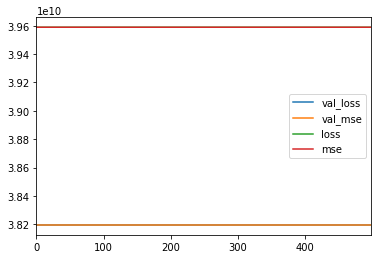

In [298]:
losses.plot()

In [299]:
from sklearn.metrics import mean_absolute_error

In [300]:
predi=model.predict(X_test)

In [301]:
mean_absolute_error(y_test,predi)

179556.373853211

In [302]:
mean_squared_error(y_test,predi)**0.5

195436.2738769024

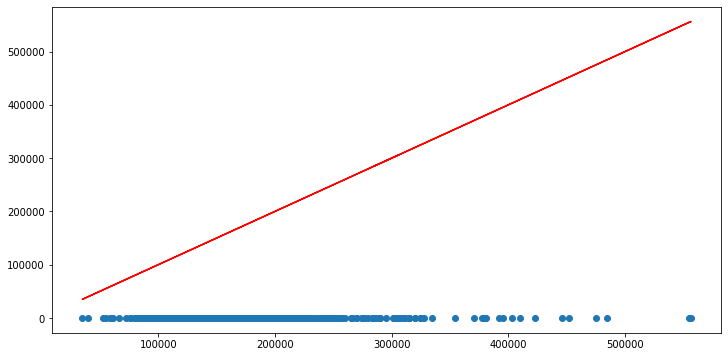

In [303]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predi)
plt.plot(y_test,y_test,'r')

In [304]:
prediT=model.predict(test2)

In [305]:
sub = pd.DataFrame()
sub['Id'] = test.Id
sub['SalePrice'] = prediT

In [306]:
sub

,Id,SalePrice
0,1461,0.0
1,1462,0.0
2,1463,0.0
3,1464,0.0
4,1465,0.0
...,...,...
1454,2915,0.0
1455,2916,0.0
1456,2917,0.0
1457,2918,0.0


In [307]:
sub.to_csv('sub_Neural.csv',index=False)

In [308]:
train.skew()

Id                  0.000000
MSSubClass          1.407657
LotFrontage         2.386156
LotArea            12.207688
OverallQual         0.216944
OverallCond         0.693067
YearBuilt          -0.613461
YearRemodAdd       -0.503562
BsmtFinSF1          1.685503
BsmtFinSF2          4.255261
BsmtUnfSF           0.920268
TotalBsmtSF         1.524255
1stFlrSF            1.376757
2ndFlrSF            0.813030
LowQualFinSF        9.011341
GrLivArea           1.366560
BsmtFullBath        0.596067
BsmtHalfBath        4.103403
FullBath            0.036562
HalfBath            0.675897
BedroomAbvGr        0.211790
KitchenAbvGr        4.488397
TotRmsAbvGrd        0.676341
Fireplaces          0.649565
GarageYrBlt        -3.869501
GarageCars         -0.342549
GarageArea          0.179981
WoodDeckSF          1.541376
OpenPorchSF         2.364342
EnclosedPorch       3.089872
3SsnPorch          10.304342
ScreenPorch         4.122214
PoolArea           14.828374
MiscVal            24.476794
MoSold        

In [309]:
train2.skew()

MSSubClass          0.654966
MSZoning           -1.547771
LotFrontage         1.699685
LotArea            12.580091
Street            -15.475751
LotShape            1.857462
LandContour         2.513120
LotConfig           1.657902
LandSlope           4.818680
Neighborhood        0.107923
BldgType           -2.868606
HouseStyle         -1.541631
OverallQual         0.209311
OverallCond        -1.344822
YearBuilt          -0.613480
YearRemodAdd       -0.461183
RoofStyle           1.459119
RoofMatl            9.359438
Exterior1st        -0.368157
Exterior2nd        -0.490240
Foundation          0.041312
BsmtExposure        1.108246
BsmtFinType1       -0.849718
BsmtFinSF1          0.765712
BsmtFinType2       -2.823775
BsmtFinSF2          4.254223
BsmtUnfSF           0.919774
Heating            -9.888170
HeatingQC          -0.539529
CentralAir         -3.564770
Electrical         -4.205724
GrLivArea           1.010133
BedroomAbvGr        0.213891
KitchenAbvGr        4.474325
KitchenQual   

In [310]:
# cols_unskew = train2.columns[abs(train2.skew()) > 1]

In [311]:
# cols_unskew

In [312]:
# for col in cols_unskew:
#     train2[col] = np.log1p(train2[col])

In [313]:
from sklearn.base import BaseEstimator, RegressorMixin

In [314]:
class CustomEnsembleRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, regressors=None):
        self.regressors = regressors

    def fit(self, X, y):
        for regressor in self.regressors:
            regressor.fit(X, y)

    def predict(self, X):
        self.predictions_ = list()
        for regressor in self.regressors:
            self.predictions_.append((regressor.predict(X).ravel()))
        return (np.mean(self.predictions_, axis=0))

In [315]:
xgb1 = XGBRegressor(learning_rate =0.06, n_estimators=3461, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:squarederror',nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006
                )

xgb2 = XGBRegressor(learning_rate =0.06, n_estimators=3461, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:squarederror',nthread=4,
                                     scale_pos_weight=1,seed=1234, 
                                     reg_alpha=0.00006
                )

xgb3 = XGBRegressor(learning_rate =0.06, n_estimators=3461, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:squarederror',nthread=4,
                                     scale_pos_weight=1,seed=1337, 
                                     reg_alpha=0.00006
                )

In [316]:
xgb_ens = CustomEnsembleRegressor([xgb1,xgb2,xgb3])

In [317]:
cvscore = cross_val_score(cv=5,estimator=xgb1,X = X_train,y = y_train)

In [318]:
cvscore.mean()

0.8930560417234341

In [319]:
cvscore.mean()

0.8930560417234341

In [320]:
cvscore.std()

0.0282561283957643

In [321]:
xgb_ens.fit(X_train,y_train)

In [322]:
predix=xgb_ens.predict(X_test)

In [323]:
mean_squared_error(y_test,predix)**0.5

19466.86350555119

In [324]:
predix_test=xgb_ens.predict(test2)

In [325]:
predix_test

array([128114.59, 160826.27, 188928.05, ..., 166297.58, 120585.72,
       198230.48], dtype=float32)

In [326]:
sub = pd.DataFrame()
sub['Id'] = test.Id
sub['SalePrice'] = predix_test
sub.to_csv('submission_xgb_group.csv',index=False)

In [327]:
sub

,Id,SalePrice
0,1461,128114.593750
1,1462,160826.265625
2,1463,188928.046875
3,1464,200197.625000
4,1465,185420.812500
...,...,...
1454,2915,81527.031250
1455,2916,84751.843750
1456,2917,166297.578125
1457,2918,120585.718750


In [328]:
sub

,Id,SalePrice
0,1461,128114.593750
1,1462,160826.265625
2,1463,188928.046875
3,1464,200197.625000
4,1465,185420.812500
...,...,...
1454,2915,81527.031250
1455,2916,84751.843750
1456,2917,166297.578125
1457,2918,120585.718750


In [329]:
from scipy import stats

In [330]:
from sklearn.preprocessing import StandardScaler

In [331]:
from sklearn.linear_model import LassoCV

In [332]:
scaler = StandardScaler()
LCV = LassoCV()

cv_score = cross_val_score(LCV, X=X_train, y=y_train, cv = 5, n_jobs=-1)

In [333]:
cv_score.mean()

0.8702550182201371

In [334]:
cv_score.std()

0.017438967649790887